THIS CODE IF FOR CALCULATION OF HEARTRATE FROM ECG SIGNAL. THIS CODE READS THE ECG SIGNAL FROM MULTIPLE .CSV FILES AND THEN CALCULATE THE HEART RATE FOR EACH INDIVIDUAL ECG SIGNAL AND STORE ALL THE HEART RATE DATA INTO A COMMON .CSV FILE.

ASSUMPTION:

SAMPLING RATE FOR ALL ECG SIGNALS IS ASSUMED TO BE SAME THAT IS 1024 SPS.

In [1]:
%matplotlib notebook
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

In [2]:
srate = 1024

BELOW CELL READS ALL THE .CSV FILES FROM THE COMMON DIRECTORY

In [3]:
os.chdir('C:/Users/ee19s/Desktop/Python_ECG_HTIC/Trial')
path = 'C:/Users/ee19s/Desktop/Python_ECG_HTIC/Trial'

In [4]:
files = os.listdir(path)

THIS CELL CONVERTS EACH .CSV FILE INTO A NUMPY ARRAY AND FORM THE SAMPLING_AXIS FOR PLOTTING OF THE SIGNALS.
LENGTH OF EACH SAMPLING AXIS IS EQUAL TO LENGTH OF CORRESPONDING ECG SIGNAL.

In [5]:
mydata = []
sa = []
for f in files:
    mydata.append(np.genfromtxt(f))
    ecg = np.array(mydata)

for i in range(len(files)):
    
    sa.append(np.arange(1,len(ecg[i])+1))
    sample_axis = np.array(sa)


BELOW CELL CONTAINS A FUNCTION THAT IS USED FOR DESIGNING A BUTTERWORTH BANDPASS FILTER.

In [6]:
def filter_design(lcf,ucf,order=5):
    
    global srate
    
    nyquist = srate/2
    
    if(lcf<ucf):
        frange = [lcf,ucf]
        
        fkernB,fkernA = scipy.signal.butter(order,np.array(frange)/nyquist,btype='bandpass')
        
        return fkernB,fkernA
    else:
        
        print('lcf must be less than ucf')

BELOW CELL CONTAINS ALL THE PROCESSING AND DETECTION OF PEAKS FOR CALCULATION OF HEART RATE AND THEN STORED THE HEART RATE RESULTS IN A .CSV FILE. 

1. DEFINE THE EMPTY LISTS LIKE FILT[] WILL STORE THE DATA OF FILTERED SIGNAL WHEN THE RAW DETRENDED ECG IS PASSED THROUGH THE DESIGNED FILTER. SMOOTH[] STORES THE DATA OF SMOOTH SIGNAL WHICH IS OBTAINED BY PASSING THE FILTERED SIGNAL THROUGH A SAVIK-GOLAY FILTER FOR TIME DOMAIN SMOOTHING. POS_PKS[] CONTAINS ALL THE PEAKS OBTAINED BY USING FIND PEAKS FUNCTION. HR[] STORES ALL THE HEART RATE DATA.

2. SET LOWER CUTTOFF FREQUENCY = 3HZ AND UPPER CUTTOFF FREQUENCY = 40 HZ AND THEN CALL THE FILTER_DESIGN FUNCTION WHICH WILL RETURN THE FILTER KERNAL COEFFICIENTS, THEN APPLY THOSE COEFFICIENTS TO THE RAW ECG USING FILTFILT FUNCTION AND STORE THAT FILTERED SIGNAL IN FILT[] LIST AND THEN CONVERT THAT LIST INTO A NUMPY ARRAY.

3. APPLY S-GOLAY FILTER TO THE FILTERED SIGNAL AND STORE THAT INTO SMOOTH[] LIST AND THEN CONVERT THAT LIST INTO NUMPY ARRAY.

4. APPLY FINDPEAKS FUNCTION FOR THE DETECTION OF PEAKS AND STORE THAT INTO POS_PKS[] LIST AND AGAIN CONVERT IT INTO NUMPY ARRAY.

5. AFTER FINDING PEAKS FIND THE LOCATION OF PEAKS AND PLOT THEM. AFTER THIS CALCULATE THE NUMBER OF SAMPLES BETWEEN TWO CONSECUTIVE PEAKS AND THEN CONVERT THIS DIFFERENCE IN NUMBER OF SAMPLES INTO THE TIME DURATION BY DIVIDING IT BY SAMPLING RATE.

6. CALCULATE THE HEART RATE BY USING THE FORMULA HR= 60/TIME DURATION AND STORE ALL THE DATA INTO A .CSV FILE.

<IPython.core.display.Javascript object>


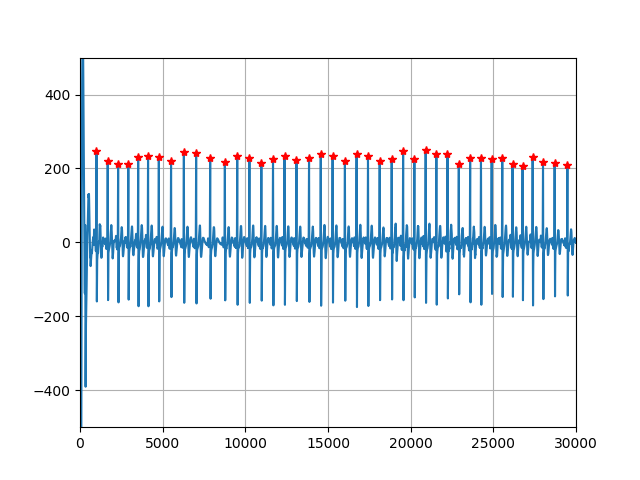

<IPython.core.display.Javascript object>


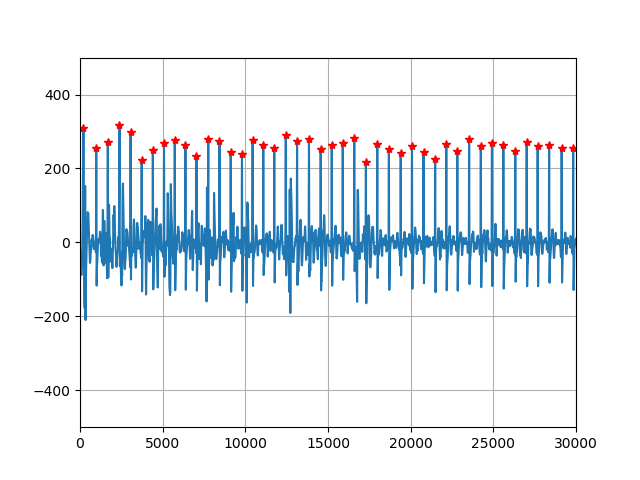

In [7]:
filt = []
smooth = []
pos_pks = []
HR = []
for i in range(len(files)):
    lcf = 3
    ucf = 40
    #st_pt = 0
    #sample_win = 60*srate
    ecg[i] = ecg[i]-np.mean(ecg[i])
    fkernB,fkernA = filter_design(lcf,ucf)
    filt.append(scipy.signal.filtfilt(fkernB,fkernA,ecg[i]))
    filtsig = np.array(filt) 
    smooth.append(scipy.signal.savgol_filter(filtsig[i],23,12))
    smoothsig = np.array(smooth)
    #smoothsig[i] = smoothsig[i][500:]
    #smoothsig[i] = smoothsig[i][st_pt:st_pt+sample_win]
    #sample_axis[i] = sample_axis[i][st_pt:st_pt+sample_win]
    
    pos_pks.append(scipy.signal.find_peaks(smoothsig[i],height = [195, 400],distance = 500))
    peaks = np.array(pos_pks)
    plt.figure(i+2)
    plt.plot(sample_axis[i],smoothsig[i])
    plt.plot(peaks[i][0],peaks[i][1]['peak_heights'],'r*')
    plt.ylim([-500,500])
    plt.xlim([0,30000])
    plt.grid(True)
    plt.show
    HR.append((60*srate)/np.diff(peaks[i][0]))
    heart_rate = np.array(HR)
    np.savetxt('test.csv',heart_rate[i], delimiter = ',',fmt = '%d',newline='\n')